<a href="https://colab.research.google.com/github/sozkaynak/Machine-Learning-with-Python/blob/master/LinearRegressionBostonMrmr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from skfeature.function.information_theoretical_based.MRMR import mrmr
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

In [3]:
from google.colab import files
uploaded = files.upload()

In [0]:
boston = load_boston()
bos = pd.DataFrame(boston.data)
bos.columns = boston.feature_names
bos['PRICE'] = boston.target


In [5]:
print(bos.head())
print(bos.describe())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  PRICE  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2  
             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.593761   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.596783   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.0000

In [0]:
X = bos.drop('PRICE', axis = 1).values
y = bos['PRICE']

In [7]:
k=X.shape[1]
print(k)
kSet=list(range(1,k+1))
print(kSet)
rmseSet=[]
r2_scoreSet=[]
for i in kSet:
  kwargs_u={"n_selected_features":i}
  X1= mrmr(X,y, **kwargs_u)
  X2=X1[0][:][:]
  x=boston.data[:,X2]
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 5)
  lm = LinearRegression()
  lm.fit(x_train, y_train)

  y_pred = lm.predict(x_test)
  
  rmse = mean_squared_error(y_test, y_pred)
  """print("kwargs_u:",kwargs_u,"için hata kareleri ortalaması(mse):",rmse)"""
  rmseSet.append(rmse)
  
  r2=r2_score(y_test, y_pred)
  """print("kwargs_u:",kwargs_u,"için r2_score:",r2)"""
  r2_scoreSet.append(r2)


13
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]


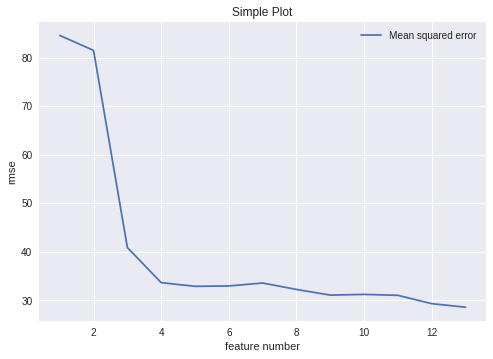

In [8]:
plt.plot(kSet, rmseSet, label='Mean squared error')
plt.xlabel('feature number')
plt.ylabel('rmse')
plt.title("Simple Plot")
plt.legend()
plt.show()

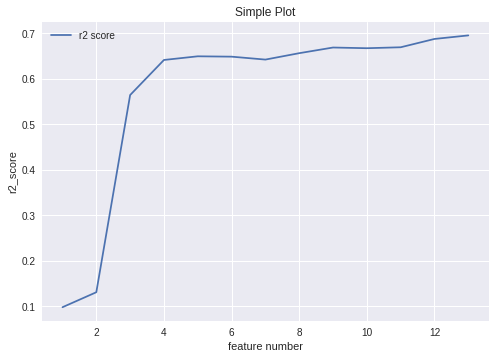

In [9]:
plt.plot(kSet, r2_scoreSet, label='r2 score')
plt.xlabel('feature number')
plt.ylabel('r2_score')
plt.title("Simple Plot")
plt.legend()
plt.show()